In [146]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [147]:
path = "C:/Users/AbdulRahman/Desktop/collage_projects/DSS/Vehicle-Trajectory-Tracking/DataSet/DataSet.csv"   

In [148]:
df = pd.read_csv(path)

In [149]:
df.head()

,trip_id,driver_id,vehicle_id,timestamp,latitude,longitude,speed,acceleration,steering_angle,heading,...,weather_conditions,road_type,traffic_condition,stop_events,geofencing_violation,anomalous_event,route_anomaly,route_deviation_score,acceleration_variation,behavioral_consistency_index
0,1,101,1001,1/5/2023 7:24,38.916143,-80.345269,39.484646,3.612832,6,212.555994,...,Sunny,Urban,Light,0,0,0,0,0.176974,0.715284,0.468189
1,2,105,2002,1/5/2023 11:28,37.011830,-89.079516,2.795422,-0.593295,-21,134.541146,...,Sunny,Highway,Light,0,0,1,0,0.229316,0.487761,0.234935
2,3,103,2002,1/2/2023 7:12,33.784009,-99.103643,13.842558,-0.209264,26,116.452839,...,Cloudy,Urban,Moderate,0,0,0,0,0.473809,0.881141,0.192588
3,4,102,2002,12/30/2022 0:40,45.314835,-102.046210,69.121833,-0.413943,6,26.970247,...,Sunny,Highway,Moderate,3,0,0,0,0.368063,0.937918,0.363707
4,5,101,2002,12/31/2022 7:04,30.473386,-92.362577,13.061111,5.774122,-1,333.804023,...,Sunny,Rural,Moderate,0,0,0,0,0.145270,0.702187,0.178748


In [150]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M')

In [151]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [152]:
df['time_of_day'] = df['timestamp'].dt.hour.apply(get_time_of_day)

In [153]:
df.head()

,trip_id,driver_id,vehicle_id,timestamp,latitude,longitude,speed,acceleration,steering_angle,heading,...,road_type,traffic_condition,stop_events,geofencing_violation,anomalous_event,route_anomaly,route_deviation_score,acceleration_variation,behavioral_consistency_index,time_of_day
0,1,101,1001,2023-01-05 07:24:00,38.916143,-80.345269,39.484646,3.612832,6,212.555994,...,Urban,Light,0,0,0,0,0.176974,0.715284,0.468189,Morning
1,2,105,2002,2023-01-05 11:28:00,37.011830,-89.079516,2.795422,-0.593295,-21,134.541146,...,Highway,Light,0,0,1,0,0.229316,0.487761,0.234935,Morning
2,3,103,2002,2023-01-02 07:12:00,33.784009,-99.103643,13.842558,-0.209264,26,116.452839,...,Urban,Moderate,0,0,0,0,0.473809,0.881141,0.192588,Morning
3,4,102,2002,2022-12-30 00:40:00,45.314835,-102.046210,69.121833,-0.413943,6,26.970247,...,Highway,Moderate,3,0,0,0,0.368063,0.937918,0.363707,Night
4,5,101,2002,2022-12-31 07:04:00,30.473386,-92.362577,13.061111,5.774122,-1,333.804023,...,Rural,Moderate,0,0,0,0,0.145270,0.702187,0.178748,Morning


In [154]:
df = df.drop(['timestamp', 'acceleration', 'steering_angle', 'heading','trip_id','driver_id','vehicle_id','fuel_consumption','behavioral_consistency_index'
             ,'acceleration_variation','route_deviation_score','geofencing_violation','stop_events','brake_usage','lane_deviation','rpm'
             ,'longitude','latitude'], axis=1)

In [155]:
df.head()

,speed,trip_duration,trip_distance,weather_conditions,road_type,traffic_condition,anomalous_event,route_anomaly,time_of_day
0,39.484646,250.980424,24.868334,Sunny,Urban,Light,0,0,Morning
1,2.795422,2112.678280,10.230086,Sunny,Highway,Light,1,0,Morning
2,13.842558,1134.936064,23.483279,Cloudy,Urban,Moderate,0,0,Morning
3,69.121833,11651.719970,1.480827,Sunny,Highway,Moderate,0,0,Night
4,13.061111,1033.826911,131.294800,Sunny,Rural,Moderate,0,0,Morning


In [156]:
col = 'anomalous_event'
df[col] = df.pop(col)

In [157]:
df.head()

,speed,trip_duration,trip_distance,weather_conditions,road_type,traffic_condition,route_anomaly,time_of_day,anomalous_event
0,39.484646,250.980424,24.868334,Sunny,Urban,Light,0,Morning,0
1,2.795422,2112.678280,10.230086,Sunny,Highway,Light,0,Morning,1
2,13.842558,1134.936064,23.483279,Cloudy,Urban,Moderate,0,Morning,0
3,69.121833,11651.719970,1.480827,Sunny,Highway,Moderate,0,Night,0
4,13.061111,1033.826911,131.294800,Sunny,Rural,Moderate,0,Morning,0


In [158]:
print(set(df['weather_conditions']))

{'Cloudy', 'Foggy', 'Sunny', 'Rainy'}


In [159]:
print(set(df['road_type']))

{'Highway', 'Rural', 'Urban'}


In [160]:
print(set(df['traffic_condition']))

{'Moderate', 'Heavy', 'Light'}


In [161]:
print(set(df['time_of_day']))

{'Morning', 'Night', 'Afternoon', 'Evening'}


In [162]:
cols_to_encode = ['weather_conditions', 'road_type', 'traffic_condition', 'time_of_day']

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    with open(f"{col}_encoder.pkl", "wb") as file:
        pickle.dump(le, file)

In [163]:
df.head()

,speed,trip_duration,trip_distance,weather_conditions,road_type,traffic_condition,route_anomaly,time_of_day,anomalous_event
0,39.484646,250.980424,24.868334,3,2,1,0,2,0
1,2.795422,2112.678280,10.230086,3,0,1,0,2,1
2,13.842558,1134.936064,23.483279,0,2,2,0,2,0
3,69.121833,11651.719970,1.480827,3,0,2,0,3,0
4,13.061111,1033.826911,131.294800,3,1,2,0,2,0


In [164]:
df['anomalous_event'].value_counts()

anomalous_event
0    107980
1     12020
Name: count, dtype: int64

In [165]:
x, y = df.iloc[:,:-1].values, df.iloc[:,-1].values

In [166]:
print(x[0])

[ 39.4846463  250.9804236   24.86833392   3.           2.
   1.           0.           2.        ]


In [167]:
print(y)

[0 1 0 ... 0 0 0]


In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree

In [169]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [170]:
with open("decision_Tree_classifier.pkl", "wb") as file:
    pickle.dump(model, file)

In [171]:
y_pred = model.predict(x_test)

## this cell was completely done by chatgpt
## best regrads abdo ibrahim

In [172]:
def plot_confusion_matrix(y_true, y_pred, labels=['Normal', 'Anomaly']):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    # Plot Confusion Matrix
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap='Blues')

    ax.set_title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    for i in range(len(cm)):
        for j in range(len(cm[0])):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=12)

    plt.colorbar(im)
    plt.tight_layout()
    plt.show()

    print(f'Accuracy: {accuracy:.2f}')

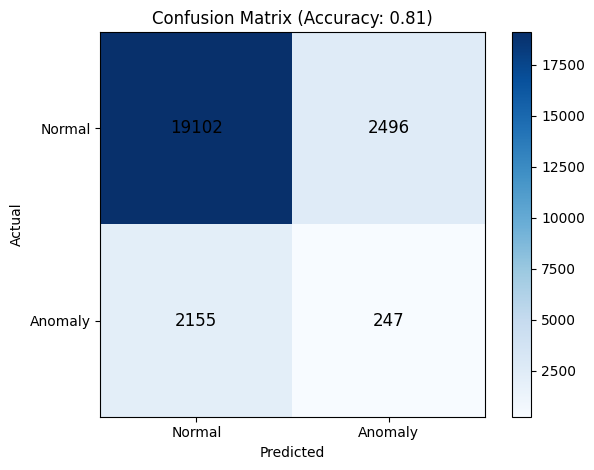

Accuracy: 0.81


In [173]:
plot_confusion_matrix(y_test,y_pred)

# Random Forest

In [174]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [175]:
y_pred = rf_model.predict(x_test)

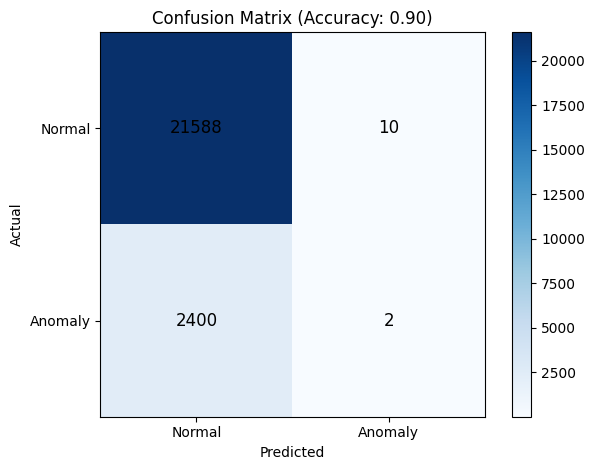

Accuracy: 0.90


In [176]:
plot_confusion_matrix(y_test,y_pred)

In [177]:
with open("random_forest_classifier.pkl", "wb") as file:
    pickle.dump(model, file)